# Testing `graphml` feature

**Testing the graphml feature addition for SmartAPI**

In [16]:
from utils.metakg.export import edges2graphml
from controller.smartapi import SmartAPI
from utils.indices import refresh, reset
from biothings.tests.web import BiothingsTestCase
import warnings
import pandas as pd

import networkx as nx

import pytest


warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [23]:
# get metakg 

# setup data
MYCHEM_URL = (
    "https://raw.githubusercontent.com/NCATS-Tangerine/translator-api-registry/master/mychem.info/openapi_full.yml"
)
# mychem ID
MYCHEM_ID = "8f08d1446e0bb9c2b323713ce83e2bd3"


In [24]:
"""
    setup state called once for the class
"""
mychem = SmartAPI(MYCHEM_URL)
mychem.username = "tester"
mychem.refresh()
mychem.check()
mychem.save()

refresh()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


In [29]:
class SmartAPIQueryTest(BiothingsTestCase):
    def test_00(self):
        res = query(q="/metakg")
        print(res)

In [30]:
!pwd

/Users/nacosta/Documents/smartAPI/smartAPI/src


In [31]:
# !pytest tests/test_graphml.py

zsh:1: command not found: pytest


---

### Testing the new `utils` function

In [43]:
def plot_graphml(file, predicate=None, color="lightblue"):
    graph = nx.read_graphml(file)
    plt.figure(figsize=(12,12))
    if predicate:
        plt.title('predicate="%s"'%predicate)
    else:
        plt.title('all available predicates')
    # pos = nx.spring_layout(graph, k = 0.5) # k regulates the distance between nodes
    nx.draw(graph, with_labels=True, node_color=color, node_size=1500)#, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
    plt.show()

In [24]:
import requests
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
METAKG_URL = 'http://localhost:8000/api/metakg'
ID = "dc91716f44207d2e1287c727f281d339"
SIZE = 10000

**Using the API we can retrieve a max of 1000 hits**(*see error below for direct error response*).

In [4]:
response = requests.get(METAKG_URL+f'?q={ID}&size={SIZE}')
print(response.status_code, response.text)

400 {"code":400,"success":false,"error":"Bad Request","keyword":"size","max":1000,"num":10000,"alias":"limit"}


Now get a succesful response (size<=1000)

In [28]:
SIZE=1000

Get `/api/metakg?q=

In [39]:
response = requests.get(METAKG_URL+f'?q={ID}&size={SIZE}')
print('[INFO] RESPONSE, %s, for ENDPOINT %s'%(response.status_code, METAKG_URL+f'?q={ID}&size={SIZE}'))

[INFO] RESPONSE, 200, for URL http://localhost:8000/api/metakg?q=dc91716f44207d2e1287c727f281d339&size=1000


In [30]:
res_dict = response.json()

In [8]:
res_dict.keys()

dict_keys(['took', 'total', 'max_score', 'hits'])

In [31]:
len(res_dict['hits'])

1000

In [40]:
response = requests.get(METAKG_URL+f'?q={ID}&size={SIZE}&format=graphml')
print('[INFO] RESPONSE, %s, for ENDPOINT %s'%(response.status_code,METAKG_URL+f'?q={ID}&size={SIZE}&format=graphml'))

[INFO] RESPONSE, 200, for ENDPOINT http://localhost:8000/api/metakg?q=dc91716f44207d2e1287c727f281d339&size=1000&format=graphml


Plot the generated graphs:

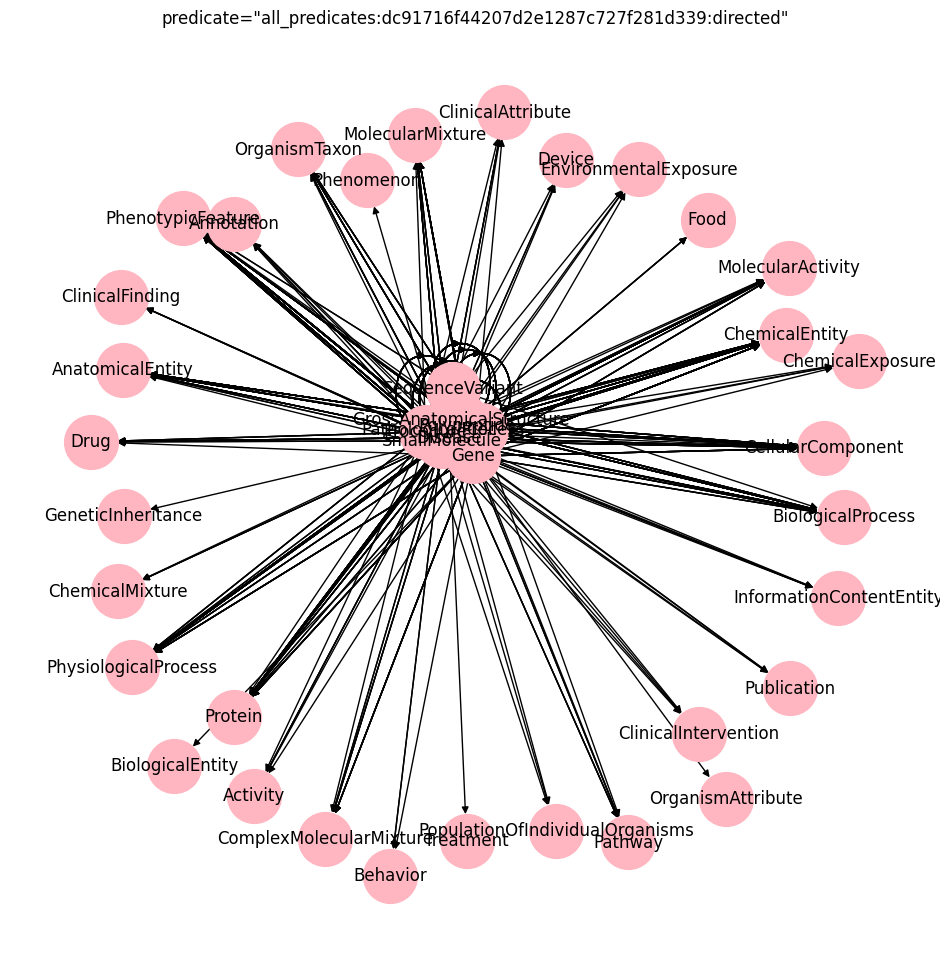

In [13]:
file="/Users/nacosta/Documents/smartAPI/smartAPI/src/dc91716f44207d2e1287c727f281d339_06_dir.graphml"
plot_graphml(file, "all_predicates:dc91716f44207d2e1287c727f281d339:directed", "lightpink")

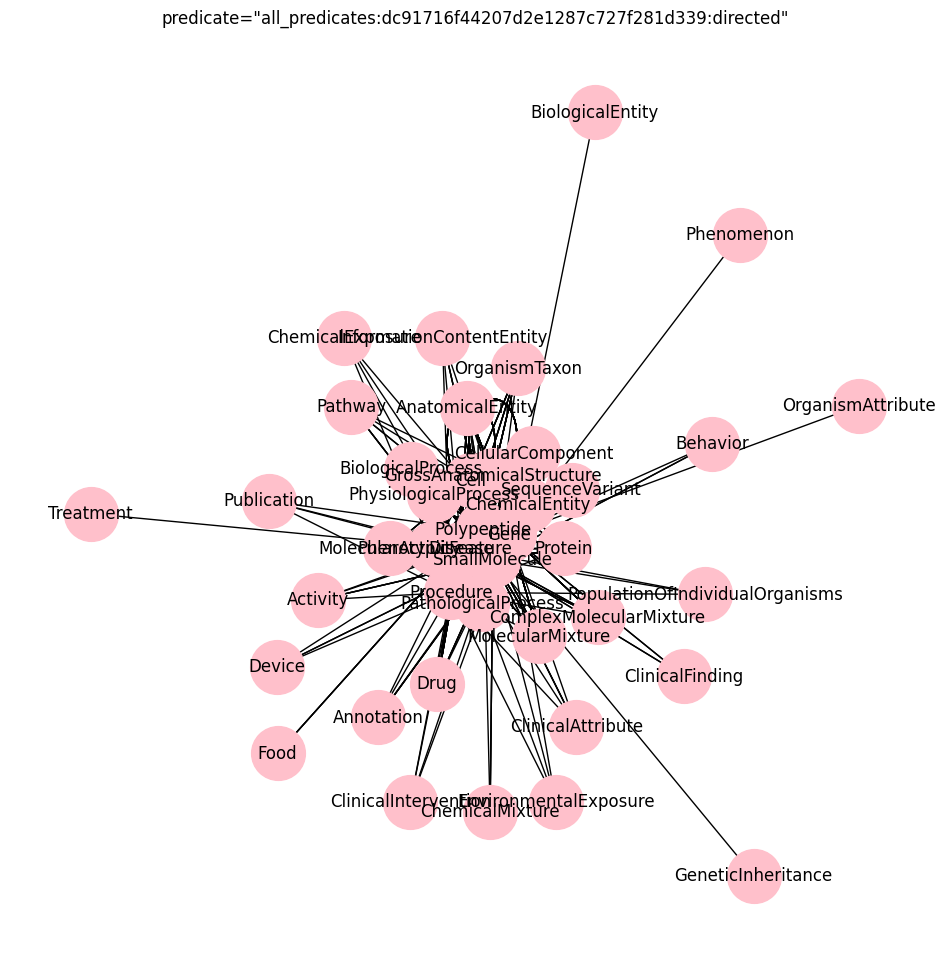

In [59]:

file="/Users/nacosta/Documents/smartAPI/smartAPI/src/dc91716f44207d2e1287c727f281d339_06_undir.graphml"
plot_graphml(file, "all_predicates:dc91716f44207d2e1287c727f281d339:directed", "pink")

In [14]:
predicate="derives_from"

In [21]:
response = requests.get(METAKG_URL+f'?q={ID}&predicate={predicate}&size={SIZE}&format=graphml')
print(response.status_code)#, response.text)

200


In [19]:
file="/Users/nacosta/Documents/smartAPI/smartAPI/src/dc91716f44207d2e1287c727f281d339_derives_from.graphml"

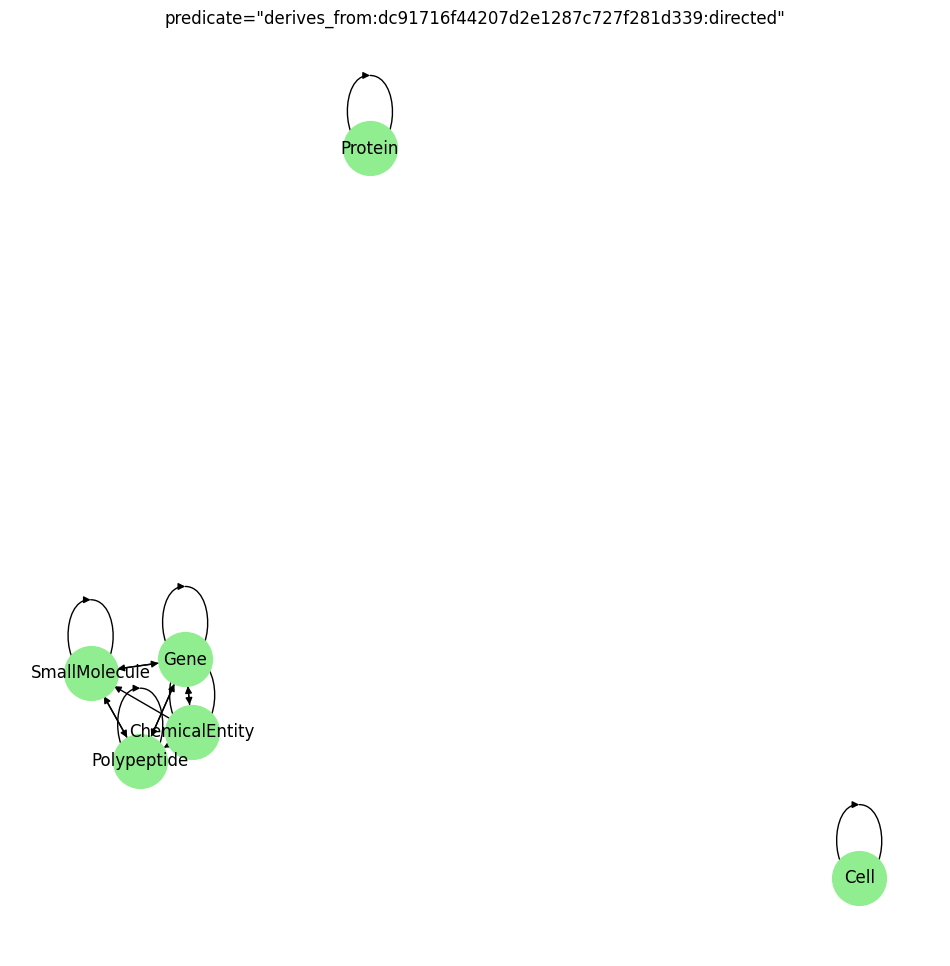

In [20]:
plot_graphml(file, "derives_from:dc91716f44207d2e1287c727f281d339:directed", "lightgreen")

In [22]:
file="/Users/nacosta/Documents/smartAPI/smartAPI/src/dc91716f44207d2e1287c727f281d339_derives_from_undir.graphml"

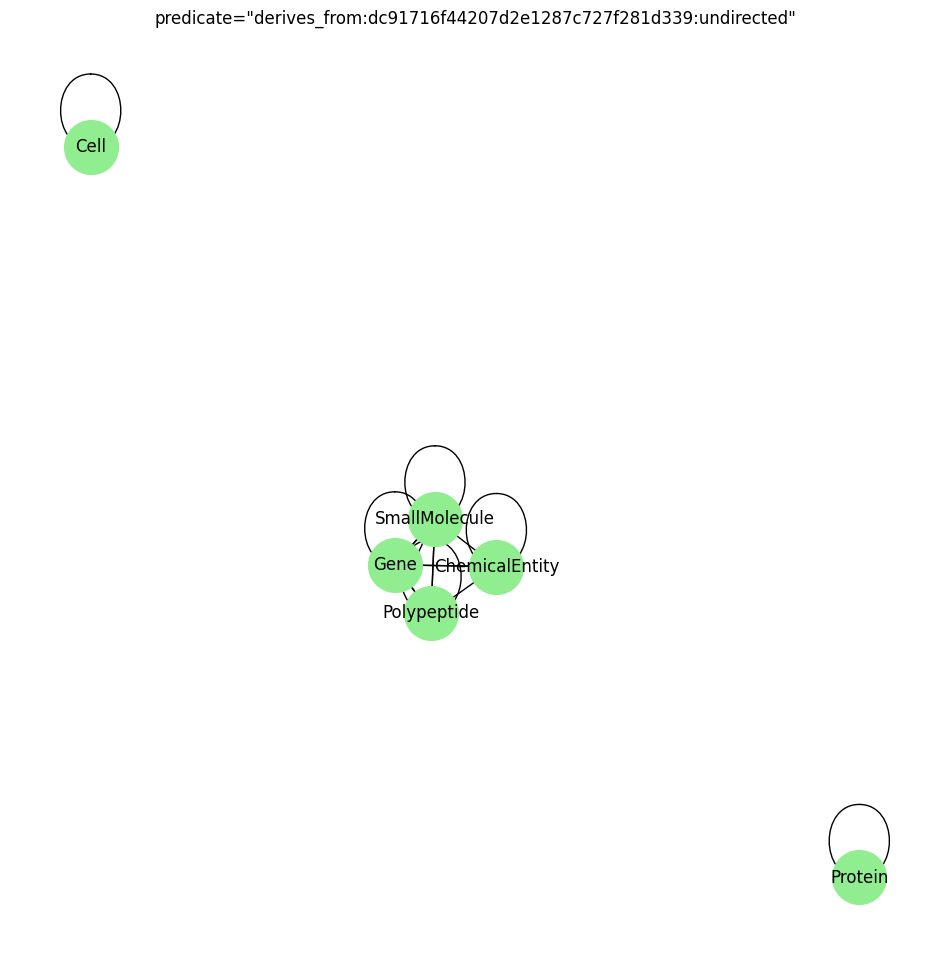

In [23]:
plot_graphml(file, "derives_from:dc91716f44207d2e1287c727f281d339:undirected", "lightgreen")

---